In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math

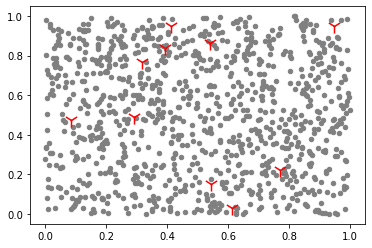

In [34]:
# 1000개의 x, y좌표를 랜덤으로 생성하여 점들을 찍는다.(units)
units = 1000 # 개체 수
k = 10 # Cluster 갯수

units_dot = np.random.rand(units, 2)
plt.scatter(units_dot[:,0], units_dot[:,1], marker = "o", color = "gray", s=20)

# 10개의 x, y좌표를 랜덤으로 생성하여 점들을 찍는다(centroids)
k_dot = np.random.rand(k, 2)
plt.scatter(k_dot[:,0], k_dot[:,1], marker = "1", color = "red", s=200)
plt.savefig('K-Means0.png')
plt.show()

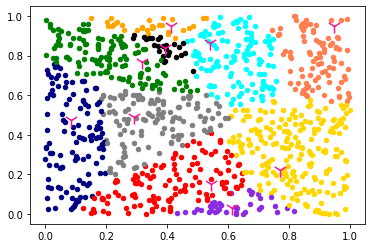

In [35]:
# 랜덤하게 정해진 좌표에서 중심과 가까운 점들을 색칠한다.
colors = ["black","red","coral","orange","gold","green","cyan","navy","gray","blueviolet"]
datax = [[],[],[],[],[],[],[],[],[],[]]
datay = [[],[],[],[],[],[],[],[],[],[]]

for i in range(units):
    result_distance = []
    best_distance = 10.0
    count = 0
    units_distance = units_dot[i,0], units_dot[i,1]
    for j in range(k):
        k_distance = k_dot[j,0], k_dot[j,1]
        distance = math.sqrt(pow(units_distance[0]-k_distance[0], 2) + pow(units_distance[1]-k_distance[1],2))
        if(best_distance > distance):
            best_distance = distance
            result_distance = [units_dot[i,0], units_dot[i,1]]
            count = j
    plt.scatter(result_distance[0], result_distance[1], marker = "o", color = colors[count], s=20)
    # 분류된 색 별로 좌표 저장
    datax[count].append(result_distance[0])
    datay[count].append(result_distance[1])
plt.scatter(k_dot[:,0], k_dot[:,1], marker = "1", color = "deeppink", s=200)
plt.savefig(f'K-Means1.png')

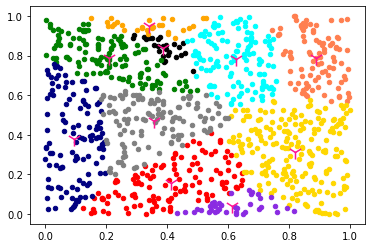

In [36]:
# 배열에 저장된 데이터 별로 색을 다시 칠해준다.
for i in range(len(datax)):
    for j in range(len(datax[i])):
        plt.scatter(datax[i][j], datay[i][j], marker="o", s=20, color=colors[i])

# 분류된 데이터를 가지고 Centroid를 다시 정한다.
k_datax = [[],[],[],[],[],[],[],[],[],[]]
k_datay = [[],[],[],[],[],[],[],[],[],[]]
for i in range(k):
    k_datax[i] = sum(datax[i])/len(datax[i])
    k_datay[i] = sum(datay[i])/len(datay[i])
    plt.scatter(k_datax[i], k_datay[i], marker="1", s=200, color="deeppink")
    plt.savefig(f'K-Means2.png')

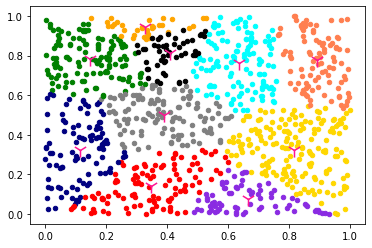

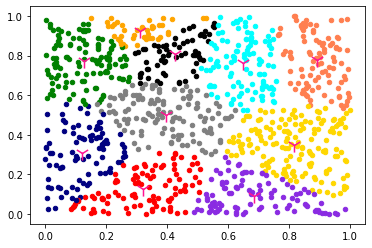

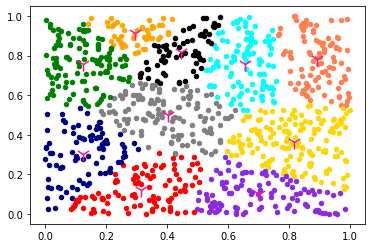

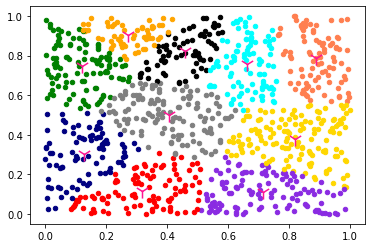

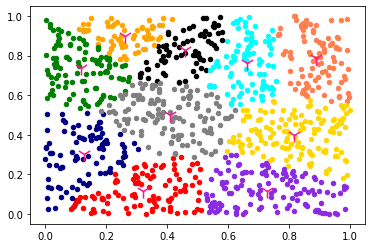

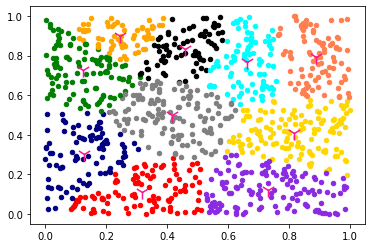

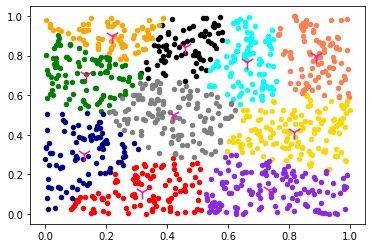

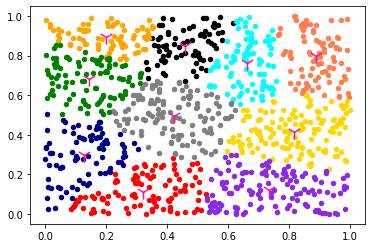

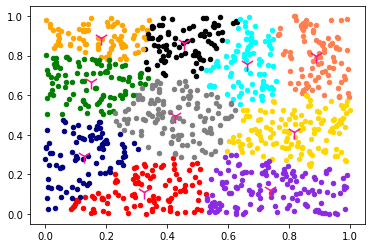

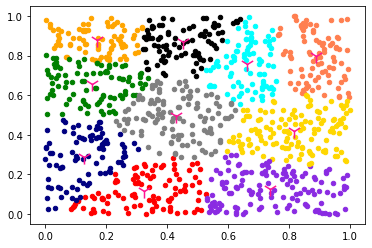

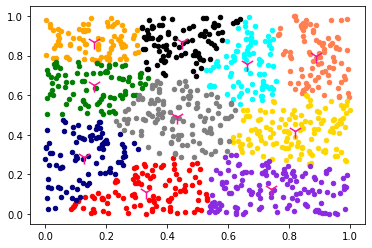

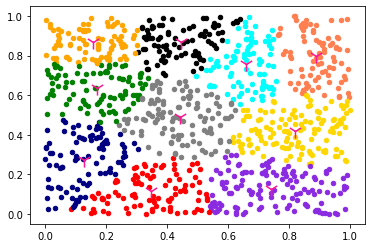

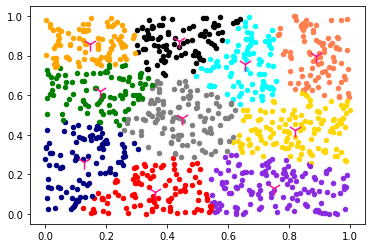

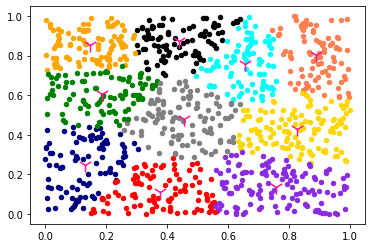

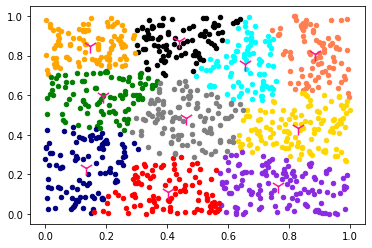

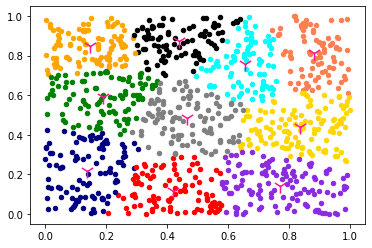

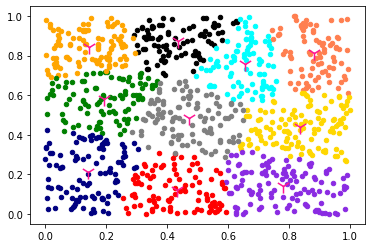

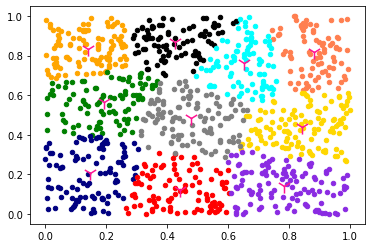

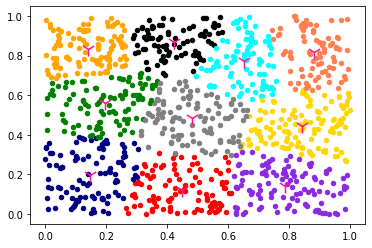

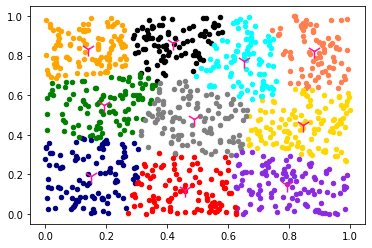

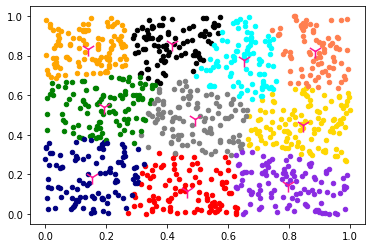

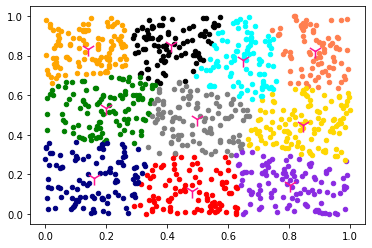

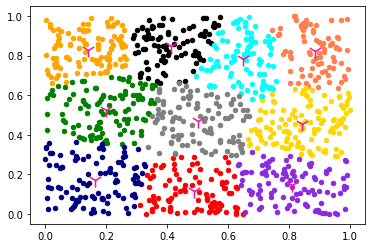

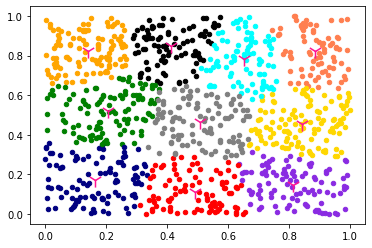

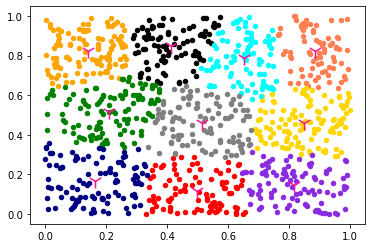

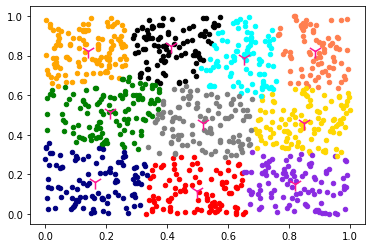

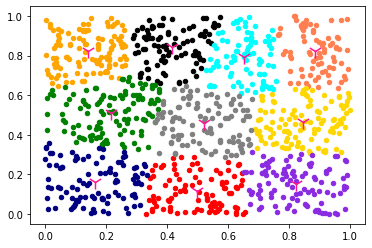

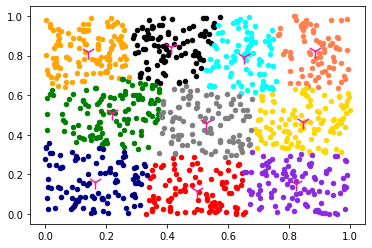

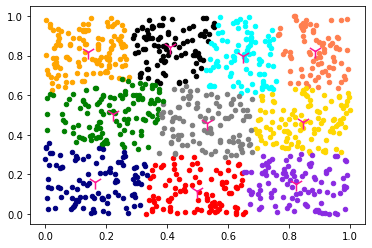

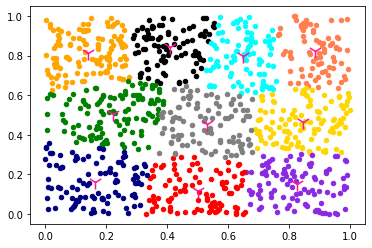

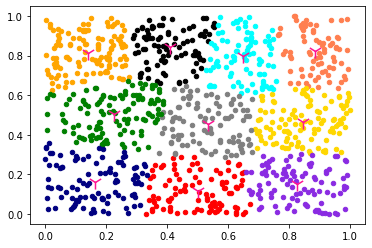

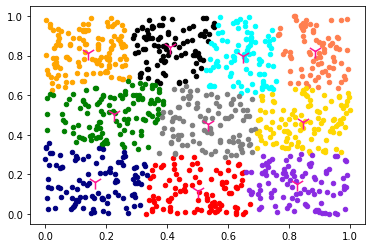

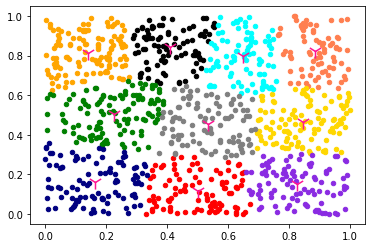

In [37]:
check = True
num = 2
while(check):
    num += 1
    cnt = 0
    rdatax = datax
    rdatay = datay
    datax = [[],[],[],[],[],[],[],[],[],[]]
    datay = [[],[],[],[],[],[],[],[],[],[]]

    for i in range(len(rdatax)): #10번 반복
        for j in range(len(rdatax[i])): #총 1000번 반복
            best_distance = 10.0
            count = 0
            for t in range(k):
                distance = math.sqrt(pow(rdatax[i][j]-k_datax[t], 2) + pow(rdatay[i][j]-k_datay[t], 2))
                if(best_distance > distance):
                    best_distance = distance
                    count = t
            plt.scatter(rdatax[i][j], rdatay[i][j], marker="o", s=20, color=colors[count])
            datax[count].append(rdatax[i][j])
            datay[count].append(rdatay[i][j])
    for i in range(k):
        if(k_datax[i] == sum(datax[i])/len(datax[i]) and k_datay[i] == sum(datay[i])/len(datay[i])):
            cnt += 1
        if(cnt == 10):
            check = False
    for i in range(k):
        k_datax[i] = sum(datax[i])/len(datax[i])
        k_datay[i] = sum(datay[i])/len(datay[i])
        plt.scatter(k_datax[i], k_datay[i], marker="1", s=200, color="deeppink")
    plt.savefig(f'K-Means{num}.png')
    plt.show()